  id      xcentroid          ycentroid          sharpness        roundness1        roundness2      npix    peak       flux       mag           daofind_mag               x                  y                         skycoord                         skycoord_centroid          
                                                                                                                                                                                                                      deg,deg                               deg,deg               
----- ------------------ ------------------ ------------------ ------------- --------------------- ---- ---------- ---------- ---------- ----------------------- ------------------ ------------------ ------------------------------------- -------------------------------------
    1  2243.212708503641  4.633206583333669  0.801043543428969   -0.05599681  -0.28556441814106553   25  6.7304754  35.016727 -3.8606887      -2.939353080300602  2243.21270850

KeyError: 'xcentroid'

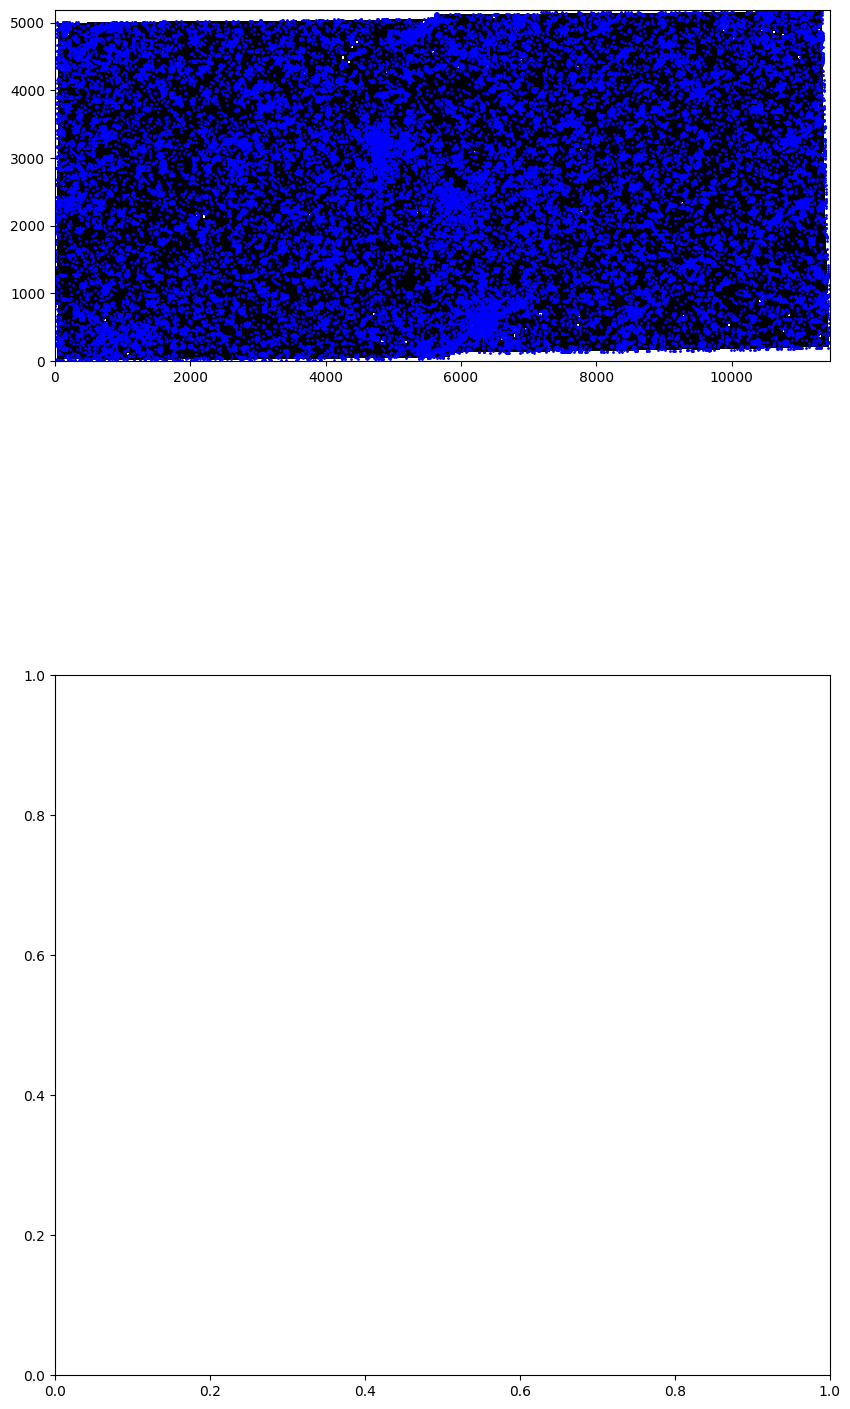

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table

def plot_catalogs(filt):
    path= f'/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/{filt}/'
    cat_daophot_fits = path+f'{filt.lower()}_merged_daophot_daofind.fits'
    cat_crowdsource_fits = path+f'{filt.lower()}_merged_crowdsource_nsky0.fits'
    cat_daophot_tab = Table.read(cat_daophot_fits)
    cat_crowdsource_tab = Table.read(cat_crowdsource_fits)
    cat_daophot_tab.pprint_all(100)
    cat_crowdsource_tab.pprint_all(100)
    image_fitsfile = path+f'pipeline/jw06151-o001_t001_nircam_clear-{filt.lower()}-merged_i2d.fits'
    fig = plt.figure(figsize=(10, 20))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    image_fits = fits.open(image_fitsfile)
    image = image_fits[1].data
    ax1.imshow(image, origin='lower', cmap='gray', vmin=0, vmax=np.nanpercentile(image, 99.9))
    ax1.scatter(cat_daophot_tab['xcentroid'], cat_daophot_tab['ycentroid'], s=1, color='blue', label='Daophot')
    ax2.scatter(cat_crowdsource_tab['xcentroid'], cat_crowdsource_tab['ycentroid'], s=1, color='red', label='Crowdsource')
    

plot_catalogs('F140M')
    